In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.43


In [54]:
def build(robot):
    R=.5
    r=R/5
    
    x=10
    y=15
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

In [55]:
def right(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 0'].F=10
    return True

def up(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 90'].F=10
    return True

def down(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 270'].F=10
    return True

def left(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 180'].F=10
    return True


In [56]:
def monitor(t,robot):
    robot.message=t,robot.controller.current_state

In [57]:
def keep_close(t,robot):
    distance=robot['disk 0'].read_distance()
    
    if distance<3:
        robot['disk 0'].F=-10
    else:
        robot['disk 0'].F=10
        

In [58]:
def keep_close(t,robot):
    distances=[disk.read_distance() for disk in robot.disks]
    
    for disk in robot.disks:
        disk.F=0
    
    idx=argmin(distances)
    distance=min(distances)
    disk=robot.disks[idx]
    
    perpendicular_idx=(idx+len(robot.disks)//4) % len(robot.disks)
    disk_perpendicular=robot.disks[perpendicular_idx]
    
    disk_perpendicular.F=10
    
    if distance<2:
        disk.F=-10
    else:
        disk.F=10
        

In [59]:
state_machine=StateMachine(
    (up,'keep_close'),
    (keep_close,"_end_simulation")
)


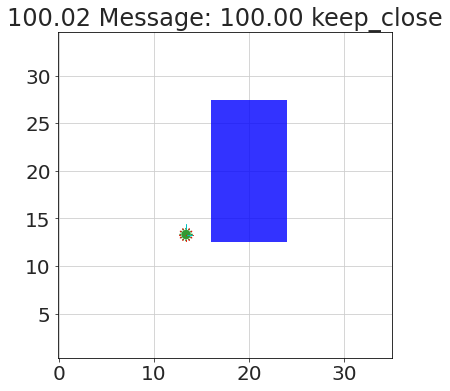

In [63]:
env=FrictionEnvironment(35,35)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=20,y=20,width=8,height=15)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )
